In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

<h1>Training And Improving Neural Networks</h1>

In [3]:
(attributes_train, labels_train), (attributes_test, labels_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


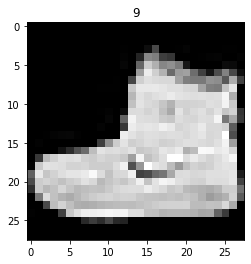

In [4]:
plt.imshow(attributes_train[0], cmap = "gray")
plt.title(labels_train[0])
plt.show()

In [5]:
attributes_train = attributes_train / 255.0
attributes_test = attributes_test / 255.0

In [6]:
input_shape = attributes_train[0].shape

In [7]:
set(labels_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [8]:
num_labels = len(set(labels_train))

In [9]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
tf.keras.backend.clear_session()

In [11]:
model = Sequential([
    Input(shape = input_shape),
    Flatten(),
    Dense(units = 128, activation = tf.keras.activations.relu),
    Dropout(0.25),
    Dense(units = 64, activation = "relu"),
    Dropout(0.1),
    Dense(units = 64, activation = "relu"),
    Dropout(0.1),
    BatchNormalization(),
    Dense(units = 32, activation = "relu"),
    Dense(units = 10, activation = "softmax")    
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

In [13]:
model.compile(
    loss = "sparse_categorical_crossentropy", 
    optimizer = Adam(),
    metrics = ["accuracy"])

In [14]:
model.fit(attributes_train, labels_train, epochs = 10, batch_size = 8, callbacks = [TensorBoard()])

Epoch 1/10
7500/7500 [==============================] - 60s 8ms/step - loss: 0.7435 - accuracy: 0.7333
Epoch 2/10
7500/7500 [==============================] - 56s 8ms/step - loss: 0.5619 - accuracy: 0.8041
Epoch 3/10
7500/7500 [==============================] - 55s 7ms/step - loss: 0.5148 - accuracy: 0.8205
Epoch 4/10
7500/7500 [==============================] - 59s 8ms/step - loss: 0.4821 - accuracy: 0.8323
Epoch 5/10
7500/7500 [==============================] - 57s 8ms/step - loss: 0.4601 - accuracy: 0.8380
Epoch 6/10
7500/7500 [==============================] - 57s 8ms/step - loss: 0.4469 - accuracy: 0.8448
Epoch 7/10
7500/7500 [==============================] - 58s 8ms/step - loss: 0.4383 - accuracy: 0.8472
Epoch 8/10
7500/7500 [==============================] - 58s 8ms/step - loss: 0.4285 - accuracy: 0.8496
Epoch 9/10
7500/7500 [==============================] - 58s 8ms/step - loss: 0.4188 - accuracy: 0.8541
Epoch 10/10
7500/7500 [==============================] - 58s 8ms/step - l

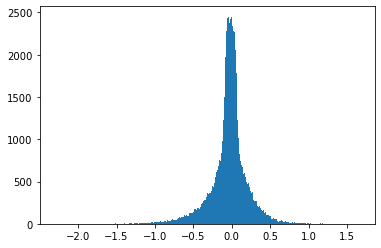

In [15]:
plt.hist(model.layers[1].kernel.numpy().ravel(), bins = "fd")
plt.show()

In [16]:
model.input

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_1')>

In [17]:
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_4')>

In [18]:
model.layers[4]

NN Explanation

In [19]:
activation_demo_model = Model(inputs = [model.input], outputs = model.layers[4].output)

In [20]:
activation_4_layer = activation_demo_model.predict(attributes_train[:10])

In [21]:
activation_4_layer[0]

array([ 0.       , 19.445675 ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       , 14.3751745, 18.089315 ,  0.       ,  0.       ,
        0.       ,  0.       , 25.038155 ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
       16.929676 ,  0.       ,  0.       ,  0.       ,  0.       ,
       15.4543705, 19.821627 , 27.197233 ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       , 13.178838 ,  0.       ,
       12.224346 ,  0.       ,  0.       ,  0.       , 11.504041 ,
        6.1272216,  0.       , 31.2043   ,  0.       , 12.392303 ,
        0.       ,  0.       ,  0.       ,  9.560898 ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ], dtype=float32)

In [22]:
list(enumerate(activation_4_layer[0]))

[(0, 0.0),
 (1, 19.445675),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 14.3751745),
 (12, 18.089315),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 25.038155),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 16.929676),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 15.4543705),
 (31, 19.821627),
 (32, 27.197233),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 13.178838),
 (39, 0.0),
 (40, 12.224346),
 (41, 0.0),
 (42, 0.0),
 (43, 0.0),
 (44, 11.504041),
 (45, 6.1272216),
 (46, 0.0),
 (47, 31.2043),
 (48, 0.0),
 (49, 12.392303),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 9.560898),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0)]

In [23]:
sorted(activation_4_layer[0])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.1272216,
 9.560898,
 11.504041,
 12.224346,
 12.392303,
 13.178838,
 14.3751745,
 15.4543705,
 16.929676,
 18.089315,
 19.445675,
 19.821627,
 25.038155,
 27.197233,
 31.2043]

In [24]:
activation_4_layer[:, 45]

array([ 6.1272216, 20.797674 ,  3.828804 ,  0.       ,  3.8415828,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ],
      dtype=float32)

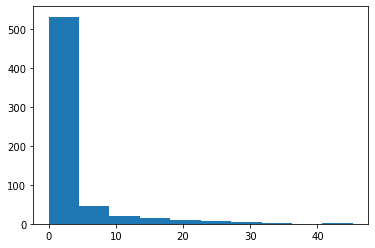

In [25]:
plt.hist(activation_4_layer.ravel())
plt.show()